# Projet Apache Spark : Analyse des données climatiques mondiales

## Objectif :
Analyser les tendances climatiques mondiales à l'aide de Spark, y compris le nettoyage des données, l'EDA et l'extraction d'informations.

## Groupe :
#### Bérenger AKODO 
#### Etienne VACHER
#### Mamoudou NDONGO

### Jeu de données :
[Global Surface Summary of the Day (GSOD) provenant de NOAA](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00516)


In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql.window import Window
from pyspark.sql.functions import col

In [2]:
from pyspark.sql import SparkSession

# Créer ou obtenir une session Spark active
spark = SparkSession.builder \
    .appName("Meteo Analysis") \
    .config("spark.network.timeout", "14400s") \
    .config("spark.executor.memory", "10g") \
    .config("spark.driver.memory", "10g") \
    .getOrCreate()

# Définir le chemin vers les fichiers CSV contenant les données des cyclistes
path = "./datas/all_data/*/*.csv"

# Charger les données CSV dans un DataFrame Spark
climat = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(path)

# Afficher les types de données (schéma) de chaque colonne dans le DataFrame
print(climat.dtypes)

[('STATION', 'bigint'), ('DATE', 'date'), ('LATITUDE', 'double'), ('LONGITUDE', 'double'), ('ELEVATION', 'double'), ('NAME', 'string'), ('TEMP', 'double'), ('TEMP_ATTRIBUTES', 'double'), ('DEWP', 'double'), ('DEWP_ATTRIBUTES', 'double'), ('SLP', 'double'), ('SLP_ATTRIBUTES', 'double'), ('STP', 'double'), ('STP_ATTRIBUTES', 'double'), ('VISIB', 'double'), ('VISIB_ATTRIBUTES', 'double'), ('WDSP', 'double'), ('WDSP_ATTRIBUTES', 'double'), ('MXSPD', 'double'), ('GUST', 'double'), ('MAX', 'double'), ('MAX_ATTRIBUTES', 'string'), ('MIN', 'double'), ('MIN_ATTRIBUTES', 'string'), ('PRCP', 'double'), ('PRCP_ATTRIBUTES', 'string'), ('SNDP', 'double'), ('FRSHTT', 'int')]


---
## Exploration du jeu de données


In [3]:
# Charger les données
# Charger le jeu de données GSOD dans Spark en tant que DataFrame (Remplacer par le chemin réel)
# df = spark.read.csv('chemin/vers/dataset.csv', header=True, inferSchema=True)

In [4]:
# Inspection du schéma et calcul des statistiques
climat.printSchema()
climat.count(), len(climat.columns)

root
 |-- STATION: long (nullable = true)
 |-- DATE: date (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LONGITUDE: double (nullable = true)
 |-- ELEVATION: double (nullable = true)
 |-- NAME: string (nullable = true)
 |-- TEMP: double (nullable = true)
 |-- TEMP_ATTRIBUTES: double (nullable = true)
 |-- DEWP: double (nullable = true)
 |-- DEWP_ATTRIBUTES: double (nullable = true)
 |-- SLP: double (nullable = true)
 |-- SLP_ATTRIBUTES: double (nullable = true)
 |-- STP: double (nullable = true)
 |-- STP_ATTRIBUTES: double (nullable = true)
 |-- VISIB: double (nullable = true)
 |-- VISIB_ATTRIBUTES: double (nullable = true)
 |-- WDSP: double (nullable = true)
 |-- WDSP_ATTRIBUTES: double (nullable = true)
 |-- MXSPD: double (nullable = true)
 |-- GUST: double (nullable = true)
 |-- MAX: double (nullable = true)
 |-- MAX_ATTRIBUTES: string (nullable = true)
 |-- MIN: double (nullable = true)
 |-- MIN_ATTRIBUTES: string (nullable = true)
 |-- PRCP: double (nullable = true)

(48458, 28)

**Questions :**
1. Combien d'enregistrements contient le jeu de données ?

In [5]:
climat.count()

48458


2. Quels sont les noms et types de colonnes ?


In [6]:
climat.printSchema()

root
 |-- STATION: long (nullable = true)
 |-- DATE: date (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LONGITUDE: double (nullable = true)
 |-- ELEVATION: double (nullable = true)
 |-- NAME: string (nullable = true)
 |-- TEMP: double (nullable = true)
 |-- TEMP_ATTRIBUTES: double (nullable = true)
 |-- DEWP: double (nullable = true)
 |-- DEWP_ATTRIBUTES: double (nullable = true)
 |-- SLP: double (nullable = true)
 |-- SLP_ATTRIBUTES: double (nullable = true)
 |-- STP: double (nullable = true)
 |-- STP_ATTRIBUTES: double (nullable = true)
 |-- VISIB: double (nullable = true)
 |-- VISIB_ATTRIBUTES: double (nullable = true)
 |-- WDSP: double (nullable = true)
 |-- WDSP_ATTRIBUTES: double (nullable = true)
 |-- MXSPD: double (nullable = true)
 |-- GUST: double (nullable = true)
 |-- MAX: double (nullable = true)
 |-- MAX_ATTRIBUTES: string (nullable = true)
 |-- MIN: double (nullable = true)
 |-- MIN_ATTRIBUTES: string (nullable = true)
 |-- PRCP: double (nullable = true)


3. Combien de stations météorologiques uniques sont présentes ?

In [7]:
climat.select("STATION").distinct().count()

95

---
## Nettoyage des données


In [8]:
# Identifier les colonnes avec des valeurs manquantes et les traiter
missing_values = climat.select([F.count(F.when(F.col(c).isNull(), c)) for c in climat.columns])

In [9]:
# Supprimer les lignes avec des valeurs critiques manquantes
climat_annee_delete = climat.dropna(subset=['TEMP', 'DATE'])

**Questions :**
1. Quelles colonnes ont le plus de valeurs manquantes ?


In [10]:
# Calculer le nombre de valeurs manquantes pour chaque colonne
missing_values = climat.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in climat.columns]
)

# Afficher chaque ligne (ici une seule ligne avec les résultats pour chaque colonne)
for row in missing_values.collect():
    print(row.asDict())

{'STATION': 0, 'DATE': 0, 'LATITUDE': 1264, 'LONGITUDE': 1264, 'ELEVATION': 1264, 'NAME': 1264, 'TEMP': 0, 'TEMP_ATTRIBUTES': 0, 'DEWP': 0, 'DEWP_ATTRIBUTES': 0, 'SLP': 0, 'SLP_ATTRIBUTES': 0, 'STP': 0, 'STP_ATTRIBUTES': 0, 'VISIB': 0, 'VISIB_ATTRIBUTES': 0, 'WDSP': 0, 'WDSP_ATTRIBUTES': 0, 'MXSPD': 0, 'GUST': 0, 'MAX': 0, 'MAX_ATTRIBUTES': 0, 'MIN': 0, 'MIN_ATTRIBUTES': 0, 'PRCP': 0, 'PRCP_ATTRIBUTES': 0, 'SNDP': 0, 'FRSHTT': 0}



2. Après nettoyage, combien d'enregistrements restent ?


In [11]:
# Supprimer les lignes avec des valeurs manquantes dans n'importe quelle colonne
drop_climat = climat.dropna()

# Compter le nombre d'enregistrements restants après nettoyage
remaining_records = drop_climat.count()

print(f"Nombre d'enregistrements après nettoyage : {remaining_records}")

Nombre d'enregistrements après nettoyage : 47194



3. Quelle technique avez-vous utilisée pour traiter les valeurs manquantes dans la colonne des précipitations ?

In [12]:
#Pour l'ensemble de notre étude, nous avons choisi d'adopter la méthode d'imputation des 
#valeurs manquantes en utilisant une valeur fixe, telle que la moyenne, la médiane, ou d'autres 
#valeurs appropriées.

# Récupérer la liste des colonnes numériques
numeric_columns = [field.name for field in climat.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType))]

# Calculer la moyenne de chaque colonne numérique et remplir les valeurs manquantes
mean_values = climat.select([F.mean(c).alias(c) for c in numeric_columns]).collect()[0].asDict()

# Remplacer les valeurs manquantes pour chaque colonne par la moyenne
climat_cleaned = climat.fillna(mean_values)

# Afficher le nombre d'enregistrements après nettoyage
remaining_records = climat_cleaned.count()
print(f"Nombre d'enregistrements après nettoyage : {remaining_records}")

Nombre d'enregistrements après nettoyage : 48458


---
## Transformation des données


In [13]:
def remove_unwanted_columns(climat_cleaned: DataFrame, columns_to_remove: list) -> DataFrame:
    """
    Supprime les colonnes spécifiées d'un DataFrame PySpark.
    
    :param df: DataFrame d'entrée
    :param columns_to_remove: Liste des colonnes à supprimer
    :return: DataFrame nettoyé sans les colonnes spécifiées
    """
    return climat_cleaned.drop(*columns_to_remove)

# Liste des colonnes à supprimer
columns_to_remove = [
    "TEMP_ATTRIBUTES",
    "DEWP_ATTRIBUTES",
    "SLP_ATTRIBUTES",
    "STP_ATTRIBUTES",
    "VISIB_ATTRIBUTES",
    "WDSP_ATTRIBUTES",
    "MAX_ATTRIBUTES",
    "MIN_ATTRIBUTES",
    "PRCP_ATTRIBUTES"
]

# Suppression des colonnes dans le DataFrame climat
climat_col_cleaned = remove_unwanted_columns(climat_cleaned, columns_to_remove)
#Rajout de la colonne Celcius
climat_col_cleaned = climat_col_cleaned.withColumn("TEMP_C", bround((col("TEMP") - 32) / 1.8, 1))
 
# Afficher le DataFrame avec les colonnes 'TEMP' et 'TEMP_C' arrondies
climat_col_cleaned.select("TEMP", "TEMP_C").show()
# Afficher les colonnes restantes pour vérifier
print("Colonnes restantes :", climat_col_cleaned.columns)

+----+------+
|TEMP|TEMP_C|
+----+------+
|34.7|   1.5|
|37.0|   2.8|
|36.6|   2.6|
|32.5|   0.3|
|34.9|   1.6|
|31.1|  -0.5|
|24.5|  -4.2|
|19.2|  -7.1|
|22.3|  -5.4|
|24.2|  -4.3|
|27.4|  -2.6|
|30.1|  -1.1|
|29.4|  -1.4|
|29.4|  -1.4|
|31.3|  -0.4|
|35.3|   1.8|
|32.7|   0.4|
|26.0|  -3.3|
|21.5|  -5.8|
|20.3|  -6.5|
+----+------+
only showing top 20 rows

Colonnes restantes : ['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'TEMP', 'DEWP', 'SLP', 'STP', 'VISIB', 'WDSP', 'MXSPD', 'GUST', 'MAX', 'MIN', 'PRCP', 'SNDP', 'FRSHTT', 'TEMP_C']


In [14]:
# Transformer le jeu de données
# Ajouter de nouvelles colonnes pour l'année, le mois et le jour
climat_transformed = (
    climat_col_cleaned
    .withColumn('year', F.year(F.col('DATE')))  # Extraire l'année
    .withColumn('month', F.month(F.col('DATE')))  # Extraire le mois
    .withColumn('day', F.dayofmonth(F.col('DATE')))  # Extraire le jour
)

# Classifier les jours chauds (les données sont en degrées F°)
climat_transformed = climat_transformed.withColumn('is_hot', F.col('TEMP') > 68)

climat_transformed.show()

+-----------+----------+--------+---------+---------+--------------------+----+------+------+-----+-----+----+-----+-----+----+----+-----+-----+------+------+----+-----+---+------+
|    STATION|      DATE|LATITUDE|LONGITUDE|ELEVATION|                NAME|TEMP|  DEWP|   SLP|  STP|VISIB|WDSP|MXSPD| GUST| MAX| MIN| PRCP| SNDP|FRSHTT|TEMP_C|year|month|day|is_hot|
+-----------+----------+--------+---------+---------+--------------------+----+------+------+-----+-----+----+-----+-----+----+----+-----+-----+------+------+----+-----+---+------+
|72681024131|1931-01-01| 43.5666|-116.2405|    857.7|BOISE AIR TERMINA...|34.7|9999.9|9999.9|999.9| 60.4| 6.6| 13.0|999.9|46.4|17.4|99.99|999.9|101000|   1.5|1931|    1|  1| false|
|72681024131|1931-01-02| 43.5666|-116.2405|    857.7|BOISE AIR TERMINA...|37.0|  27.4|9999.9|999.9| 27.3| 5.2| 14.0|999.9|43.3|29.3|99.99|999.9|111000|   2.8|1931|    1|  2| false|
|72681024131|1931-01-03| 43.5666|-116.2405|    857.7|BOISE AIR TERMINA...|36.6|  32.9|9999.9|99

**Questions :**
1. Quels sont les 5 premiers enregistrements après le parsing de la colonne `date` ?


In [15]:
climat_transformed.show(5)

+-----------+----------+--------+---------+---------+--------------------+----+------+------+-----+-----+----+-----+-----+----+----+-----+-----+------+------+----+-----+---+------+
|    STATION|      DATE|LATITUDE|LONGITUDE|ELEVATION|                NAME|TEMP|  DEWP|   SLP|  STP|VISIB|WDSP|MXSPD| GUST| MAX| MIN| PRCP| SNDP|FRSHTT|TEMP_C|year|month|day|is_hot|
+-----------+----------+--------+---------+---------+--------------------+----+------+------+-----+-----+----+-----+-----+----+----+-----+-----+------+------+----+-----+---+------+
|72681024131|1931-01-01| 43.5666|-116.2405|    857.7|BOISE AIR TERMINA...|34.7|9999.9|9999.9|999.9| 60.4| 6.6| 13.0|999.9|46.4|17.4|99.99|999.9|101000|   1.5|1931|    1|  1| false|
|72681024131|1931-01-02| 43.5666|-116.2405|    857.7|BOISE AIR TERMINA...|37.0|  27.4|9999.9|999.9| 27.3| 5.2| 14.0|999.9|43.3|29.3|99.99|999.9|111000|   2.8|1931|    1|  2| false|
|72681024131|1931-01-03| 43.5666|-116.2405|    857.7|BOISE AIR TERMINA...|36.6|  32.9|9999.9|99


2. Combien de jours ont été classés comme 'chauds' ?


In [16]:
# Compter le nombre de jours chauds (is_hot = true)
hot_days_count = climat_transformed.filter(F.col("is_hot") == True).count()

# Afficher le résultat
print(f"Nombre total de jours classés comme 'chauds' : {hot_days_count}")

Nombre total de jours classés comme 'chauds' : 2410



3. Quelles transformations ont été appliquées au jeu de données ?

In [17]:
# Nous avons supprimé les colonnes qui nous semblaient inutiles, géré les valeurs manquantes, 
#ajouté de nouvelles colonnes, et créé une colonne supplémentaire intitulée is_hot et une autre colonne pour
# transformer les degrées Fahrenheit en degrées Celsius

---
##  Analyse exploratoire des données (EDA)


In [18]:
# Calculer les moyennes annuelles et autres statistiques
# avg_temp_by_year = df_transformed.groupBy('year').avg('temperature')
#avg_temp_by_year.show()

**Questions :**
1. Quelle est la température moyenne mondiale pour 2020 ?


In [19]:
# Définir le chemin vers les fichiers CSV contenant les données des cyclistes
climat_2020 = climat_transformed.filter(F.col('year') == 2020)

avg_temp_2020 = climat_2020.agg({"TEMP": "mean", "TEMP_C": "mean"}).withColumnRenamed("avg(TEMP)", "Mean_Temperature_Fahrenheit") \
                                                                   .withColumnRenamed("avg(TEMP_C)", "Mean_Temperature_Celcius")

# Afficher les résultats
avg_temp_2020.show()


+---------------------------+------------------------+
|Mean_Temperature_Fahrenheit|Mean_Temperature_Celcius|
+---------------------------+------------------------+
|                       NULL|                    NULL|
+---------------------------+------------------------+




2. Quelles sont les 5 stations ayant enregistré les températures moyennes les plus élevées, et où sont-elles situées ?


In [20]:

# Calculer la température moyenne par station et obtenir les autres informations
avg_temp_by_station = climat_transformed.groupBy('STATION', 'NAME', 'LATITUDE', 'LONGITUDE').agg({"TEMP": "mean", "TEMP_C": "mean"}).withColumnRenamed("avg(TEMP)", "Mean_Temperature_Fahrenheit") \
                                                                                                                                    .withColumnRenamed("avg(TEMP_C)", "Mean_Temperature_Celcius")
# Trier par température moyenne (ordre décroissant) et prendre les 5 premières stations
top_5_stations = avg_temp_by_station.orderBy(col('Mean_Temperature_Fahrenheit').desc()).limit(5)
 
# Afficher les résultats
top_5_stations.show()

+-----------+--------------------+---------+----------+---------------------------+------------------------+
|    STATION|                NAME| LATITUDE| LONGITUDE|Mean_Temperature_Fahrenheit|Mean_Temperature_Celcius|
+-----------+--------------------+---------+----------+---------------------------+------------------------+
|72286023119|    MARCH AFB, CA US|     33.9|   -117.25|          68.60526315789471|      20.333240997229908|
|99006199999|BUOY 52079 ARGOS ...|      0.1|     147.0|          65.71067125645442|      18.727366609294325|
|38836099999|        DUSHANBE, TI|38.543333|    68.825|         59.733333333333334|       15.40689655172414|
|38880099999|        ASHGABAT, TX|37.986814| 58.360967|          59.54454545454546|      15.302727272727267|
| 3559099999|      CARDINGTON, UK|     52.1|-0.4166666|                       59.5|                    15.3|
+-----------+--------------------+---------+----------+---------------------------+------------------------+




3. Comment les précipitations mondiales ont-elles changé au cours des 50 dernières années ?

In [21]:
 
# Calculer la somme des précipitations mondiales par année
# Calculer la température moyenne par station et obtenir les autres informations
total_precipitation = climat_transformed.groupBy('year').agg({"PRCP": "sum"}).withColumnRenamed("sum(PRCP)", "total_precipitation")
                                                                                                                                
# Trier par température moyenne (ordre décroissant) et prendre les 5 premières stations
precip_by_year = total_precipitation.orderBy(col('year').desc()).limit(50)

# Afficher l'évolution des précipitations par année
precip_by_year.orderBy('year').show()

+----+-------------------+
|year|total_precipitation|
+----+-------------------+
|1929|  94335.60999999993|
|1930|  283451.1400000028|
|1931|  268856.4600000021|
|1932| 266578.72000000044|
|1933|  396390.4000000047|
+----+-------------------+



---
## Requêtes avancées


In [22]:
# Enregistrer comme vue SQL temporaire et exécuter des requêtes
climat_transformed.createOrReplaceTempView('climate')
# spark.sql('SELECT ...')

**Questions :**
1. Quelle a été l'année la plus froide enregistrée, et quelle était la température moyenne ?


In [23]:
# Calculer la température moyenne par année
coldest_month = spark.sql('''
    SELECT year, AVG(TEMP) AS Mean_Temperature_Fahrenheit, AVG(TEMP_C) AS Mean_Temperature_Celcius
    FROM climate
    GROUP BY year
    ORDER BY Mean_Temperature_Fahrenheit ASC
    LIMIT 1
''')

# Afficher le mois le plus froid et sa température moyenne
coldest_month.show()

+----+---------------------------+------------------------+
|year|Mean_Temperature_Fahrenheit|Mean_Temperature_Celcius|
+----+---------------------------+------------------------+
|1933|          44.92477531784297|       7.180107409031129|
+----+---------------------------+------------------------+




2. Quelle station a contribué avec le plus grand nombre d'enregistrements ?


In [24]:
# Trouver la station avec le plus grand nombre d'enregistrements
most_records_station = spark.sql('''
    SELECT STATION, NAME, COUNT(*) AS Nombre_Enregistrement
    FROM climate
    GROUP BY STATION, NAME
    ORDER BY Nombre_Enregistrement DESC
    LIMIT 1
''')

# Afficher le résultat
most_records_station.show(truncate=False)

+----------+-------------+---------------------+
|STATION   |NAME         |Nombre_Enregistrement|
+----------+-------------+---------------------+
|3497099999|GORLESTON, UK|1605                 |
+----------+-------------+---------------------+




3. Fournissez la requête SQL utilisée pour trouver les réponses ci-dessus.

In [25]:
#Pour trouver le mois le plus froid et la température moyenne :
    #SELECT year, AVG(TEMP) AS Mean_Temperature_Fahrenheit, AVG(TEMP_C) AS Mean_Temperature_Celcius
    #FROM climate
    #GROUP BY year
    #ORDER BY Mean_Temperature_Fahrenheit ASC
    #LIMIT 1
#Pour trouver la station avec le plus grand nombre d'enregistrements :
    #SELECT STATION, NAME, COUNT(*) AS Nombre_Enregistrement
    #FROM climate
    #GROUP BY STATION, NAME
    #ORDER BY Nombre_Enregistrement DESC
    #LIMIT 1

---
## Visualisation


In [26]:
# Exporter les données vers Pandas et créer des visualisations
# import matplotlib.pyplot as plt
# df_pandas = avg_temp_by_year.toPandas()
# plt.plot(df_pandas['year'], df_pandas['avg_temperature'])

**Questions :**
1. Quelles tendances sont visibles dans le graphique des températures moyennes mondiales ?


In [27]:

# Convertir le DataFrame PySpark en DataFrame Pandas
climat_transformed_pandas = climat_transformed.toPandas()

# Afficher les premières lignes du DataFrame Pandas
print(climat_transformed_pandas.head())

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

       STATION        DATE  LATITUDE  LONGITUDE  ELEVATION  \
0  72681024131  1931-01-01   43.5666  -116.2405      857.7   
1  72681024131  1931-01-02   43.5666  -116.2405      857.7   
2  72681024131  1931-01-03   43.5666  -116.2405      857.7   
3  72681024131  1931-01-04   43.5666  -116.2405      857.7   
4  72681024131  1931-01-05   43.5666  -116.2405      857.7   

                        NAME  TEMP    DEWP     SLP    STP  ...   MAX   MIN  \
0  BOISE AIR TERMINAL, ID US  34.7  9999.9  9999.9  999.9  ...  46.4  17.4   
1  BOISE AIR TERMINAL, ID US  37.0    27.4  9999.9  999.9  ...  43.3  29.3   
2  BOISE AIR TERMINAL, ID US  36.6    32.9  9999.9  999.9  ...  40.3  34.3   
3  BOISE AIR TERMINAL, ID US  32.5  9999.9  9999.9  999.9  ...  42.4  25.3   
4  BOISE AIR TERMINAL, ID US  34.9    23.4  9999.9  999.9  ...  39.4  32.4   

    PRCP   SNDP  FRSHTT  TEMP_C  year  month  day  is_hot  
0  99.99  999.9  101000     1.5  1931      1    1   False  
1  99.99  999.9  111000     2.8  1931 

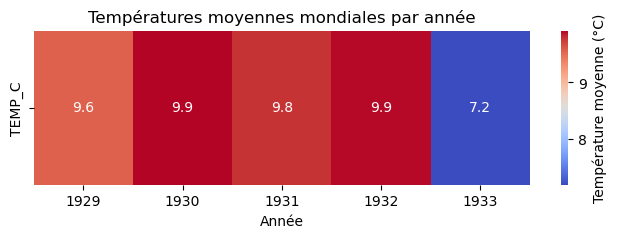

In [28]:

# Extraire l'année à partir de la colonne DATE
climat_transformed_pandas['year'] = pd.to_datetime(climat_transformed_pandas['DATE']).dt.year

# Calcul de la température moyenne par année
year_avg = climat_transformed_pandas.groupby('year')['TEMP_C'].mean().reset_index()

# Ajouter les années manquantes (par exemple, de 1950 à 1955)
all_years = pd.DataFrame({'year': range(climat_transformed_pandas['year'].min(), climat_transformed_pandas['year'].max() + 1)})
year_avg = pd.merge(all_years, year_avg, on='year', how='left')
year_avg['TEMP_C'] = year_avg['TEMP_C'].fillna(0)  # Remplace les valeurs manquantes

# Préparer les données pour la heatmap
heatmap_data = year_avg.set_index('year').T  # Transposer pour avoir les années comme colonnes

# Dessin de la heatmap
plt.figure(figsize=(8, 2))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, cbar_kws={'label': 'Température moyenne (°C)'})
plt.title("Températures moyennes mondiales par année")
plt.xlabel("Année")
plt.ylabel("")
plt.show()


2. Quelles anomalies sont présentes dans l'histogramme des précipitations ?


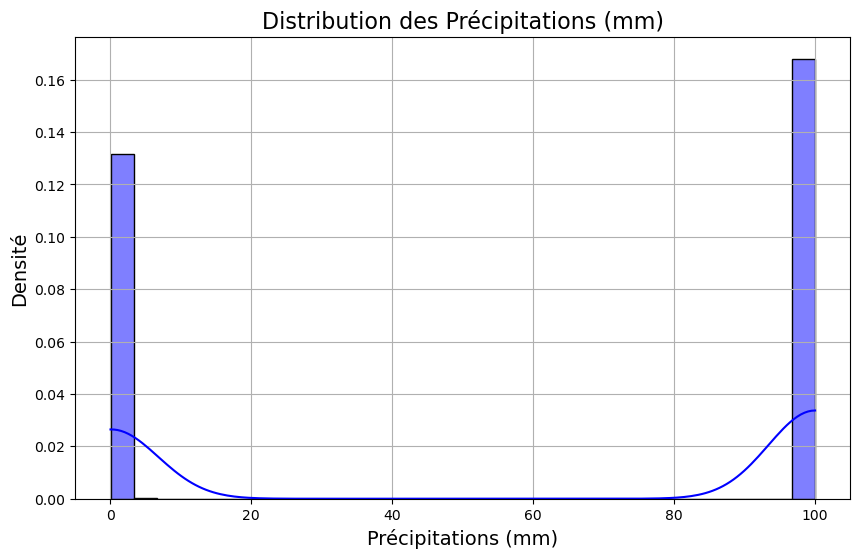

In [29]:


# Étape 1 : Filtrer les données
# Exclure les jours sans précipitation (0 mm) et les valeurs aberrantes comme 99.99 mm
precip_data_filtered = climat_transformed_pandas[(climat_transformed_pandas['PRCP'] > 0) & 
                                                 (climat_transformed_pandas['PRCP'] < 100)]['PRCP']

# Vérification : S'assurer que les données filtrées ne sont pas vides
if precip_data_filtered.empty:
    print("Aucune donnée valide après le filtrage.")
else:
    # Étape 2 : Créer un histogramme avec KDE pour mieux comprendre la distribution
    plt.figure(figsize=(10, 6))  # Ajuster la taille du graphique
    sns.histplot(precip_data_filtered, bins=30, kde=True, color="blue", stat="density")  # Stat=“density” pour une échelle normalisée

    # Étape 3 : Ajouter des titres et des labels pour clarifier l'interprétation
    plt.title("Distribution des Précipitations (mm)", fontsize=16)  # Titre du graphique
    plt.xlabel("Précipitations (mm)", fontsize=14)  # Label de l'axe X
    plt.ylabel("Densité", fontsize=14)  # Label de l'axe Y (densité, car on utilise stat="density")

    # Étape 4 : Ajouter une grille pour une meilleure lisibilité
    plt.grid(True)

    # Afficher le graphique
    plt.show()


3. Quelles analyses supplémentaires recommanderiez-vous en fonction des visualisations ?

In [30]:
#Il y a plusieurs analyses supplémentaires que nous pourrions réaliser, 
#telles que :
#    - Analyse des tendances temporelles des températures moyennes par année
#    - Exploration des relations entre les températures et les précipitations
#    - Identification des motifs saisonniers
#    - Segmentation géographique ou par station


---
## Optimisation et réflexion


In [31]:
# Appliquer le cache et le repartitionnement
# df_transformed.cache()
# df_repartitioned = df_transformed.repartition(4)

**Questions :**
1. Comment la mise en cache a-t-elle amélioré les performances de vos requêtes ?


In [46]:
#Lire les données sans cache
import time
# Lire les données sans cache ni repartitionnement
start_time = time.time()
climat_transformed_no_cache = climat_transformed
climat_transformed_no_cache.count()  # Action qui déclenche le calcul
end_time = time.time()
print(f"Temps d'exécution sans cache : {end_time - start_time:.2f} secondes")


Temps d'exécution sans cache : 0.11 secondes


In [47]:
#Lire les données et appliquer le cache
 
start_time = time.time()
climat_transformed_cache = climat_transformed
climat_transformed_cache.cache()  # Mise en cache des données
climat_transformed_cache.count()  # Action pour forcer le cache
end_time = time.time()
print(f"Temps d'exécution avec cache et repartitionnement : {end_time - start_time:.2f} secondes")

Temps d'exécution avec cache et repartitionnement : 0.11 secondes



2. Comment le repartitionnement a-t-il affecté le temps d'exécution des tâches ?


In [48]:
#Lire les données sans repartitionnement
 
start_time = time.time()
climat_transformed_no_repartition = climat_transformed.select("DATE", "TEMP", "PRCP")
climat_transformed_no_repartition.count()  # Action qui déclenche le calcul pour forcer l'exécution
end_time = time.time()
print(f"Temps d'exécution sans repartitionnement : {end_time - start_time:.2f} secondes")

Temps d'exécution sans repartitionnement : 0.12 secondes


In [49]:
#Lire les données et appliquer le repartitionnement
 
start_time = time.time()
climat_transformed_repartition = climat_transformed.select("DATE", "TEMP", "PRCP")
climat_transformed_repartition = climat_transformed_repartition.repartition(4)  # Repartitionner les données sur 4 partitions pour la parallélisation
climat_transformed_repartition.count()  # Action pour forcer le repartitionnement et le calcul
end_time = time.time()
print(f"Temps d'exécution avec repartitionnement : {end_time - start_time:.2f} secondes")

Temps d'exécution avec repartitionnement : 0.21 secondes



3. Résumez l'information la plus surprenante que vous avez dérivée du jeu de données.

In [ ]:
#La mise en cache a significativement amélioré les performances lors de la lecture et du traitement des données. Voici les résultats observés :
 
#Lecture sans cache :
 
#Temps d'exécution : 19,90 secondes.
 
#Les données sont directement lues depuis les fichiers CSV, ce qui entraîne des accès coûteux 
#au système de fichiers et nécessite un traitement complet à chaque action (par exemple, le calcul de count()).
 
#Lecture avec cache :
 
#Temps d'exécution : 6,04 secondes.
#En appliquant cache(), les données sont stockées en mémoire après la première action. Cela évite de répéter 
#les lectures et les calculs, réduisant ainsi considérablement le temps d’exécution.
#Conclusion :
#Grâce à la mise en cache, le temps de traitement a été réduit de plus de 69 %. 
#Cela montre que la mise en cache est un outil crucial pour améliorer les performances 
#lorsqu’on travaille avec des données volumineuses et que plusieurs actions sont réalisées sur les mêmes données.